### Gelman-Rubin $\hat{R}$ statistic
- m: Number of chains
- n: Number of samples
- The variation with the chains is measured by 
$$
W = \frac{1}{m} \sum_{j=1}^m \left[ \frac{1}{n-1} \sum_{i=1}^n (y_{ij} - \overline{y}_{\cdot j })^2\right]
$$
where $\overline{y}_{\cdot j }$ is the average of $\{y_{ij}\}$

- The variation between the chains is measured by 
$$
B = \frac{n}{m-1} \sum_{j=1}^m (\overline{y}_{\cdot j} - \overline {y}_{\cdot \cdot})^2,
$$
where $\overline {y}_{\cdot \cdot}$ is the average of all $\overline{y}_{\cdot j}$

If the Markov chains have related stationary, then 
$$
E[W] = E[B] = Var(Y)
$$
- We estimate the variance $Var(Y)$ by
$$
\hat{V}  = \frac{n-1}{n} W + \frac{1}{n} B.
$$
- The Gelman-Rubin $\hat{R}$ statistic is then 
$$
\hat{R} = \sqrt{\frac{\hat{V}}{W}},
$$
which declines to 1 as $n \rightarrow \infty$
- It is suggested that we keep simulating the Markov chain until $\hat{R} < 1.1$

Other - Stan:https://mc-stan.org/users/documentati

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def get_R(chains):
    # chains: 2D numpy array with shape (num_chains, num_samples)
    num_chains = chains.shape[0] # number of chains m
    num_samples = chains.shape[1] # number of samples n
    chain_means = np.mean(chains, axis=1)
    all_meas = np.mean(chain_means)

    B  = num_samples / (num_chains - 1) * np.sum((chain_means - all_meas)**2)
    W = 1 / num_chains * np.sum(np.var(chains, axis=1))

    Var_hat = (num_samples - 1) / num_samples * W + 1 / num_samples * B
    R = np.sqrt(Var_hat / W)

    return R

np.random.seed(66666)
num_chains = 4 # m
num_samples = 1000 #n
chains = np.random.normal(0,1,(num_chains, num_samples)) # Normal(0,1) Distibution
#chains.shape
R_hat = get_R(chains)
print(R_hat)

1.0001909275558218


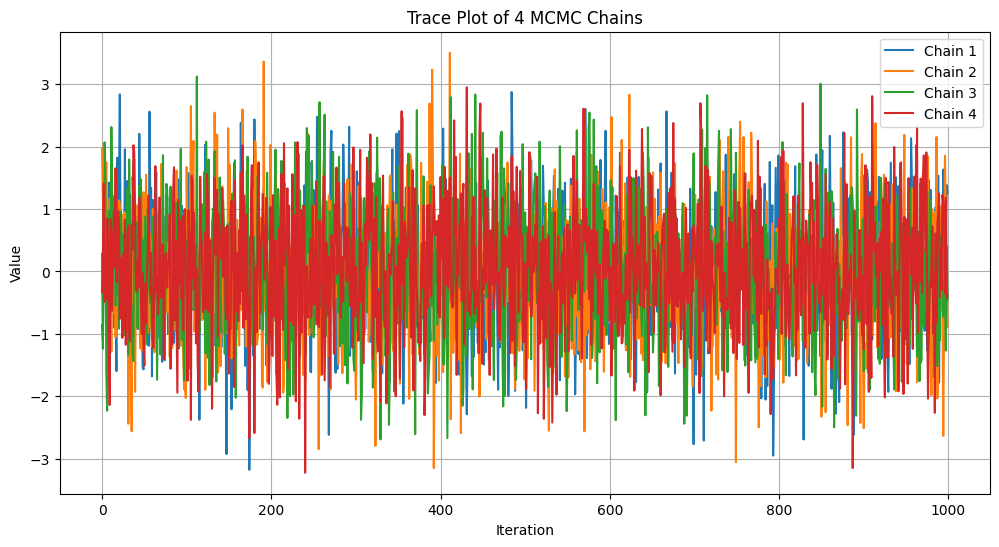

In [14]:
# Plot all chains
plt.figure(figsize=(12, 6))
for i in range(num_chains):
    plt.plot(chains[i, :], label=f'Chain {i+1}')
    
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Trace Plot of 4 MCMC Chains')
plt.legend()
plt.grid(True)
plt.show()

### Confidence Interval

In [31]:
import scipy.stats as stats
def get_confidence_interval(data,confidence):
    data_size = len(data)
    data_mean = np.mean(data)
    data_std = np.std(data,ddof=1)
    se = data_std/np.sqrt(data_size)
    z_score = stats.norm.ppf(1-(1-confidence)/2)
    confidence_interval = [data_mean - z_score*se, data_mean + z_score*se]
    return confidence_interval


chain1 = chains[0, :]
chain2 = chains[1, :]
chain3 = chains[2, :]
chain4 = chains[3, :]
for i in range(num_chains):
    current_chain = chains[i, :]
    print(f"Chain {i+1}'s Shape: {current_chain.shape[0]}")
    confidence_interval = get_confidence_interval(current_chain, 0.95)
    print(f"Chain {i+1}'s Confidence Interval: {confidence_interval}")
    if i != num_chains - 1:
        print(f'\n')

Chain 1's Shape: 1000
Chain 1's Confidence Interval: [-0.05305433686726836, 0.06909252624243661]


Chain 2's Shape: 1000
Chain 2's Confidence Interval: [-0.11357930432481653, 0.014981613204690915]


Chain 3's Shape: 1000
Chain 3's Confidence Interval: [-0.03249748048438876, 0.094295499700861]


Chain 4's Shape: 1000
Chain 4's Confidence Interval: [-0.03201178620052225, 0.09024175216151573]
